In [1]:
import altair as alt
import pandas as pd


data_path = 'data/AUM_V4_Activity_2018-06-21_17-16-27.csv'

In [2]:
df = pd.read_csv(data_path, parse_dates=[['Date', 'Time']])
df = df[:-3]
df = df.set_index('Date_Time')
# or 
# df.set_index('Date_Time', inplace=True)
# or
# index = pd.DatetimeIndex(df.Date_Time)
# df = pd.Series(df['App name', 'Duration'], index=index)
df.head(10)

,App name,Duration
Date_Time,,
6/21/18 5:15:40 PM,App Usage,0:00:00
6/21/18 5:15:38 PM,System UI,0:00:02
6/21/18 5:15:36 PM,Files,0:00:02
6/21/18 5:15:36 PM,Screen on (unlocked),0:00:00
6/21/18 5:15:28 PM,Screen on (locked),0:00:08
6/21/18 5:14:30 PM,Screen off (not locked),0:00:58
6/21/18 5:13:14 PM,Files,0:01:16
6/21/18 5:12:54 PM,Gmail,0:00:20
6/21/18 5:12:50 PM,Huawei Share,0:00:04


In [3]:
type(df)

pandas.core.frame.DataFrame

## Update Index. Convert Duration to TimeDelta

In [3]:
df['Duration'] = pd.to_timedelta(df.Duration)
df.index = pd.to_datetime(df.index)
df.head()

,App name,Duration
Date_Time,,
2018-06-21 17:15:40,App Usage,00:00:00
2018-06-21 17:15:38,System UI,00:00:02
2018-06-21 17:15:36,Files,00:00:02
2018-06-21 17:15:36,Screen on (unlocked),00:00:00
2018-06-21 17:15:28,Screen on (locked),00:00:08


In [4]:
# tinder = df.loc[df['App name'] == "Tinder"]
tinder = df[df['App name'] == 'Tinder']
tinder.head()

,App name,Duration
Date_Time,,
2018-06-21 16:46:16,Tinder,00:00:11
2018-06-21 16:45:43,Tinder,00:00:27
2018-06-21 16:39:43,Tinder,00:05:54
2018-06-21 13:55:09,Tinder,00:00:00
2018-06-21 13:51:07,Tinder,00:03:24


In [6]:
grouped = df.groupby('App name')
grouped.head()

,App name,Duration
Date_Time,,
2018-06-21 17:15:40,App Usage,00:00:00
2018-06-21 17:15:38,System UI,00:00:02
2018-06-21 17:15:36,Files,00:00:02
2018-06-21 17:15:36,Screen on (unlocked),00:00:00
2018-06-21 17:15:28,Screen on (locked),00:00:08
2018-06-21 17:14:30,Screen off (not locked),00:00:58
2018-06-21 17:13:14,Files,00:01:16
2018-06-21 17:12:54,Gmail,00:00:20
2018-06-21 17:12:50,Huawei Share,00:00:04


In [7]:
t = grouped.get_group('Tinder')
t.index = t.index.to_series().dt.to_period('H')

In [8]:
t = t.groupby(t.index).sum()
t.head()

,App name,Duration
Date_Time,,
2018-06-14 20:00,TinderTinder,00:07:33
2018-06-14 22:00,TinderTinder,00:00:54
2018-06-15 00:00,TinderTinderTinder,00:02:59
2018-06-15 01:00,TinderTinderTinderTinderTinderTinderTinderTind...,00:16:59
2018-06-15 06:00,Tinder,00:00:01


In [9]:
t.Duration = pd.to_datetime('2018-01-01') + t.Duration
t

,App name,Duration
Date_Time,,
2018-06-14 20:00,TinderTinder,2018-01-01 00:07:33
2018-06-14 22:00,TinderTinder,2018-01-01 00:00:54
2018-06-15 00:00,TinderTinderTinder,2018-01-01 00:02:59
2018-06-15 01:00,TinderTinderTinderTinderTinderTinderTinderTind...,2018-01-01 00:16:59
2018-06-15 06:00,Tinder,2018-01-01 00:00:01
2018-06-15 09:00,Tinder,2018-01-01 00:00:23
2018-06-15 12:00,TinderTinderTinder,2018-01-01 00:03:02
2018-06-15 13:00,TinderTinderTinder,2018-01-01 00:02:19
2018-06-15 14:00,Tinder,2018-01-01 00:00:12


In [10]:
# times = pd.DatetimeIndex(tinder.index)
i = tinder.index
type(tinder)

pandas.core.frame.DataFrame

In [11]:
# tinder = tinder.groupby([i.date, i.hour]).Duration.sum().reset_index()
dates = tinder.groupby([i.date]).Duration.sum().to_frame().reset_index()
dates.head()

,index,Duration
0,2018-06-14,00:08:27
1,2018-06-15,00:28:49
2,2018-06-16,00:54:47
3,2018-06-17,00:22:24
4,2018-06-18,00:42:51


In [12]:
dates['index'] = pd.to_datetime(dates['index'])
dates['Duration'] = pd.DatetimeIndex(dates['Duration']).time
# dates['Duration'] = pd.datetime.time(dates['Duration'])
dates.dtypes

index       datetime64[ns]
Duration            object
dtype: object

In [13]:
hour = tinder.groupby([i.hour]).Duration.sum().to_frame().reset_index()
hour.dtypes

Date_Time              int64
Duration     timedelta64[ns]
dtype: object

In [14]:
t.plot(x='Date_Time', y='Duration', kind='bar')

KeyError: 'Date_Time'

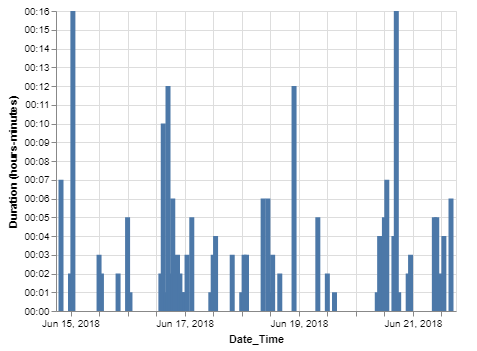

In [10]:
chart = alt.Chart(tinder).mark_bar().encode(
#     x='day(Date):O',
    x='Date_Time:T',
    y='hoursminutes(Duration)'
)

chart

In [6]:
tinder = tinder.resample('H')['Duration'].sum().reset_index()
tinder.head(20)

,Date_Time,Duration
0,2018-06-14 20:00:00,00:07:33
1,2018-06-14 21:00:00,00:00:00
2,2018-06-14 22:00:00,00:00:54
3,2018-06-14 23:00:00,00:00:00
4,2018-06-15 00:00:00,00:02:59
5,2018-06-15 01:00:00,00:16:59
6,2018-06-15 02:00:00,00:00:00
7,2018-06-15 03:00:00,00:00:00
8,2018-06-15 04:00:00,00:00:00
9,2018-06-15 05:00:00,00:00:00


In [8]:
tinder.Duration = pd.to_datetime(tinder['Date_Time'].dt.date.astype(str)+' '+tinder['Duration'].dt.to_pytimedelta().astype(str))

In [9]:
tinder.head()

,Date_Time,Duration
0,2018-06-14 20:00:00,2018-06-14 00:07:33
1,2018-06-14 21:00:00,2018-06-14 00:00:00
2,2018-06-14 22:00:00,2018-06-14 00:00:54
3,2018-06-14 23:00:00,2018-06-14 00:00:00
4,2018-06-15 00:00:00,2018-06-15 00:02:59


In [ ]:
%matplotlib inline
# import seaborn; seaborn.set()

In [ ]:
# tinder[:20].plot(x='Date_Time', y='Duration', kind='bar')
hour.plot(x='Date_Time', y='Duration', kind='bar')

In [ ]:
type(tinder)